# 逻辑斯蒂回归和分类器

In [1]:
import numpy
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# 加载鸢尾花数据集
iris = datasets.load_iris()
# 只用类别0和类别1
index = iris.target < 2
# 只用花萼长度和花萼宽度这两个特征
X = iris.data[index,:2]
Y = iris.target[index]

# 建立逻辑斯蒂回归模型
classifier = LogisticRegression()
classifier.fit(X, Y)

# 计算分类正确率
y = classifier.predict(X)
error = numpy.mean(numpy.abs(y-Y))
print(error)
# 输出0.0，表示能够完全正确分类

0.0


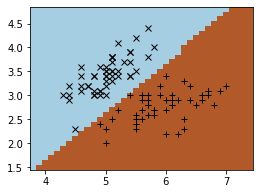

In [3]:
import matplotlib.pyplot as plt
import numpy

# 建立一个二维网格
# 我们要计算所有网格点对应的预测值
xx, yy = numpy.meshgrid(
    numpy.arange(X[:,0].min()-0.5,X[:,0].max()+0.5,0.1),
    numpy.arange(X[:,1].min()-0.5,X[:,1].max()+0.5,0.1))

# 将网格点组织为二维输入样本
input = numpy.concatenate(
    (xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)

# 计算出模型的预测结果
# 然后组织为网格点对应的位置
z = classifier.predict(input)
z = z.reshape(xx.shape)

# 将网格点的预测结果显示出来
# 这样我们就可以观察到分类边界
fig = plt.figure(figsize=(4, 3))
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired, shading='auto')

# 同时叠加显示两个类别的样本点
for i in range(2):
    index = Y == i
    mark = 'kx' if i == 0 else 'k+'
    plt.plot(X[index,0], X[index,1], mark)

plt.show()

In [4]:
print(classifier.coef_)
# 输出权值向量
# [[ 3.0786959 -3.0220097]]
print(classifier.intercept_)
# 输出偏置参数
# [-7.30634549]

[[ 3.0786959 -3.0220097]]
[-7.30634549]


## 支持向量机

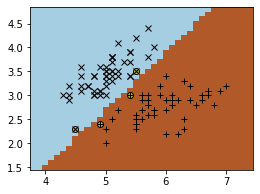

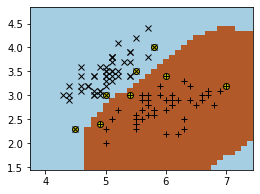

In [5]:
import numpy
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# 加载鸢尾花数据集
iris = datasets.load_iris()
index = iris.target < 2
X = iris.data[index,:2]
Y = iris.target[index]

# 创建两个支持向量机，分别采用线性核与高斯核
# C是正则化参数，数值越大正则化强度越小
# 正则化参数是用来防止过度拟合的
# 这里使用一个较大的参数值减弱正则化，以便显示原始结果
linear_svm = svm.SVC(kernel='linear', C=1e5)
# 高斯核的带宽参数是gamma
rbf_svm = svm.SVC(kernel='rbf', C=1e5, gamma=1)
svm_models = [linear_svm, rbf_svm]
for model in svm_models:
    model.fit(X, Y)

# 分别绘制两个支持向量机的决策边界
xx, yy = numpy.meshgrid(
    numpy.arange(X[:,0].min()-0.5,X[:,0].max()+0.5,0.1),
    numpy.arange(X[:,1].min()-0.5,X[:,1].max()+0.5,0.1))
input = numpy.concatenate(
    (xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
for model in svm_models:
    z = model.predict(input)
    z = z.reshape(xx.shape) 
    fig = plt.figure(figsize=(4, 3))
    plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired, shading='auto')
    # 绘制样本点
    for i in range(2):
        index = Y == i
        mark = 'kx' if i == 0 else 'k+'
        plt.plot(X[index,0], X[index,1], mark)
    # 绘制支持向量
    support = model.support_vectors_
    plt.scatter(support[:,0], support[:,1], c='y', edgecolors='k')
    plt.show()